# 10.5.3 Actor-Critic Methods

## Explanation of Actor-Critic Methods

Actor-Critic methods are a combination of policy-based and value-based methods in reinforcement learning. These methods involve two main components:
- **Actor**: The component responsible for selecting actions based on the policy. The actor updates the policy parameters in the direction suggested by the critic.
- **Critic**: The component that evaluates the actions taken by the actor by computing the value function. The critic estimates the value of the state-action pairs and helps the actor improve its policy.

In Actor-Critic methods, the actor decides the action to take, and the critic provides feedback on the action by evaluating how good or bad it was, using a value function. The actor uses this feedback to update the policy, while the critic updates the value function.

## Benefits and Use Cases of Actor-Critic Methods

Actor-Critic methods offer several benefits:
- **Reduced Variance**: By using the value function estimated by the critic, Actor-Critic methods can reduce the variance typically seen in pure policy-based methods.
- **Continuous Action Spaces**: Actor-Critic methods are well-suited for environments with continuous action spaces, as they can directly parameterize the policy.
- **Stability**: The combination of actor and critic leads to more stable learning as the critic guides the actor, reducing the risk of drastic policy changes.

### **Use Cases**:
- **Robotics**: Actor-Critic methods can be used in robotics for continuous control tasks where the robot needs to learn smooth actions.
- **Autonomous Vehicles**: These methods are useful in scenarios where vehicles must make decisions in real-time with continuous action spaces.
- **Game Playing**: Actor-Critic methods are applied in complex games where strategies must be refined over time through experience.

## Methods for Implementing Actor-Critic Methods

To implement Actor-Critic methods, follow these steps:

1. **Initialize the Policy and Value Networks**: Use neural networks to represent the actor (policy) and the critic (value function).

2. **Collect Experience**: Interact with the environment to collect state-action-reward transitions.

3. **Update the Critic**: Use the collected experience to calculate the TD error and update the value network.

4. **Update the Actor**: Adjust the policy based on the feedback from the critic, guiding the policy towards actions that yield higher rewards.

5. **Repeat**: Continue interacting with the environment, updating the actor and critic networks until the policy converges.

Actor-Critic methods are versatile and powerful tools in reinforcement learning, offering a balance between exploration and exploitation, and they are highly effective in solving complex, real-world problems.


___
___
### Readings:
- [The Actor-Critic Reinforcement Learning algorithm](https://medium.com/intro-to-artificial-intelligence/the-actor-critic-reinforcement-learning-algorithm-c8095a655c14)
- [Understanding Actor Critic Methods and A2C](https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f)
- [Exploring the Dynamics of Decision Making: An Insight into Actor-Critic Methods](https://readmedium.com/en/https:/medium.com/the-modern-scientist/exploring-the-dynamics-of-decision-making-an-insight-into-actor-critic-methods-and-their-dafdc0153d94)
- [RL — Actor-Critic Methods: A3C, GAE, DDPG, Q-prop](https://jonathan-hui.medium.com/rl-actor-critic-methods-a3c-gae-ddpg-q-prop-e1c41f268541)
___
___

In [1]:
import numpy as np
import gym
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set up the environment
env = gym.make("CartPole-v1")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

In [4]:
# Hyperparameters
gamma = 0.99
lr_actor = 0.001
lr_critic = 0.005
episodes = 500

In [5]:
# Actor Model
def create_actor():
    model = tf.keras.Sequential([
        layers.Input(shape=(state_dim,)),
        layers.Dense(24, activation='relu'),
        layers.Dense(24, activation='relu'),
        layers.Dense(action_dim, activation='softmax')
    ])
    return model

# Critic Model
def create_critic():
    model = tf.keras.Sequential([
        layers.Input(shape=(state_dim,)),
        layers.Dense(24, activation='relu'),
        layers.Dense(24, activation='relu'),
        layers.Dense(1)
    ])
    return model

In [6]:
actor = create_actor()
critic = create_critic()

actor_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_actor)
critic_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_critic)

# Function to choose action based on policy
def choose_action(state):
    state = np.expand_dims(state, axis=0)
    prob = actor(state).numpy()[0]
    return np.random.choice(action_dim, p=prob)

In [7]:
rewards_history = []

for episode in range(episodes):
    state = env.reset()
    state = list(state)[0]
    episode_reward = 0

    with tf.GradientTape() as tape_actor, tf.GradientTape() as tape_critic:
        while True:
            action = choose_action(state)
            next_state, reward, done, _, _ = env.step(action)
            episode_reward += reward

            # Compute target and advantage
            target = reward + (1 - done) * gamma * critic(np.expand_dims(next_state, axis=0))
            advantage = target - critic(np.expand_dims(state, axis=0))

            # Compute losses
            action_prob = actor(np.expand_dims(state, axis=0))
            log_prob = tf.math.log(action_prob[0, action])
            actor_loss = -log_prob * advantage
            critic_loss = advantage ** 2

            if done:
                rewards_history.append(episode_reward)
                break

            state = next_state

    # Backpropagate the losses after exiting the loop
    actor_grads = tape_actor.gradient(actor_loss, actor.trainable_variables)
    critic_grads = tape_critic.gradient(critic_loss, critic.trainable_variables)

    actor_optimizer.apply_gradients(zip(actor_grads, actor.trainable_variables))
    critic_optimizer.apply_gradients(zip(critic_grads, critic.trainable_variables))


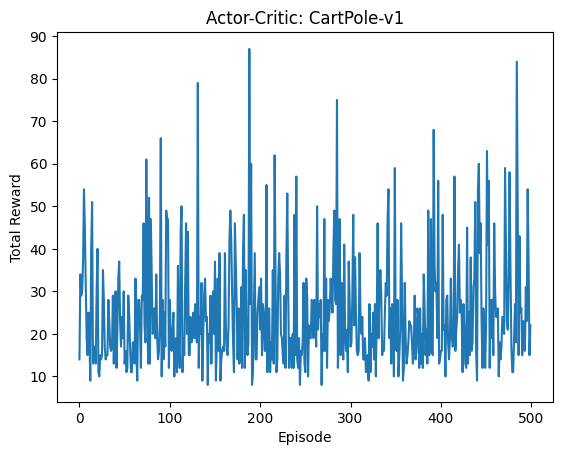

In [8]:
plt.plot(rewards_history)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Actor-Critic: CartPole-v1')
plt.show()

# Close the environment
env.close()

## Conclusion

In this section, we explored Actor-Critic methods as a combination of policy-based and value-based approaches in reinforcement learning. The provided Python code demonstrated how to implement an Actor-Critic algorithm using TensorFlow, focusing on balancing exploration and exploitation to optimize decision-making in an environment. By calculating gradients efficiently and visualizing the rewards over episodes, the code offers a practical insight into how Actor-Critic methods can be used for solving complex reinforcement learning tasks, such as the CartPole-v1 environment.
